# Описание проекта

Заказчик этого исследования — Министерство культуры Российской Федерации.
Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.
Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

## Описание данных

Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
title — название фильма;
puNumber — номер прокатного удостоверения;
show_start_date — дата премьеры фильма;
type — тип фильма;
film_studio — студия-производитель;
production_country — страна-производитель;
director — режиссёр;
producer — продюсер;
age_restriction — возрастная категория;
refundable_support — объём возвратных средств государственной поддержки;
nonrefundable_support — объём невозвратных средств государственной поддержки;
financing_source — источник государственного финансирования;
budget — общий бюджет фильма;
ratings — рейтинг фильма на КиноПоиске;
genres — жанр фильма.
Обратите внимание, что столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.
Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
puNumber — номер прокатного удостоверения;
box_office — сборы в рублях.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Ознакомление с данными

In [2]:
df1 = pd.read_csv('mkrf_movies.csv')
df2 = pd.read_csv('mkrf_shows.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
df1.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [6]:
df2.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


### Промежуточный вывод 1

Данные достаточно качественные, пригодны для работы.

## Предобработка данных

In [7]:
df2.puNumber = df2.puNumber.astype(str) #приведение общего столбца двух таблиц к одному типу значений

In [8]:
df_comm = df1.merge(df2, how='left', on='puNumber') #объединение таблиц

In [9]:
df_comm.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [10]:
df_comm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [11]:
pd.DataFrame(round(df_comm.isna().mean()*100,)).style.background_gradient('coolwarm') #оценка количества пропусков

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,8.000000
age_restriction,0.000000
refundable_support,96.000000


In [12]:
df_comm['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Есть пропуски и есть аномальные значения, не подходящие для анализа

In [13]:
df_comm['ratings'] = df_comm['ratings'].str.replace('%', '') #удаление знака %

In [14]:
df_comm['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28', '3.7', '1.4', '3.1', '97',
       '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1',
       '3.6', '83', '64', '91', '94', '62', '79', '90', '19', '88', '1.0',
       '89', '1.3', '1.9', '1.8', '1.2', '1.7', '9.0', '98', '8.9', '9.1'],
      dtype=object)

In [15]:
df_comm.ratings = df_comm.ratings.astype(float) #изменение типа данных для последующего анализа

In [16]:
df_comm[df_comm['ratings'] > 10]['ratings'].count() #количество аномальных данных, их мало, можно удалить 

29

In [17]:
df_comm.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

In [18]:
df_comm = df_comm.loc[df_comm['ratings'] <= 10] #удаление аномальных значений и пропусков 

In [19]:
df_comm['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, 8.2, 7.5, 6.7, 7.9, 5.9, 6.2,
       5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4, 4.4,
       4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2, 5.2,
       4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8, 1.5,
       2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7, 9. ,
       8.9, 9.1])

In [20]:
df_comm.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 5
production_country          2
director                    3
producer                  478
age_restriction             0
refundable_support       6176
nonrefundable_support    6176
budget                   6176
financing_source         6176
ratings                     0
genres                      6
box_office               3591
dtype: int64

In [21]:
df_comm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6490 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  6490 non-null   object 
 1   puNumber               6490 non-null   object 
 2   show_start_date        6490 non-null   object 
 3   type                   6490 non-null   object 
 4   film_studio            6485 non-null   object 
 5   production_country     6488 non-null   object 
 6   director               6487 non-null   object 
 7   producer               6012 non-null   object 
 8   age_restriction        6490 non-null   object 
 9   refundable_support     314 non-null    float64
 10  nonrefundable_support  314 non-null    float64
 11  budget                 314 non-null    float64
 12  financing_source       314 non-null    object 
 13  ratings                6490 non-null   float64
 14  genres                 6484 non-null   object 
 15  box_

In [22]:
df_comm['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [23]:
df_comm['type'] = df_comm['type'].replace({' Художественный': 'Художественный', ' Анимационный': 'Анимационный'})
# удаление скрытых дубликатов (лишний пробел)

In [24]:
df_comm['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [25]:
df_comm.duplicated().sum()

0

In [26]:
df_comm['title'].duplicated().sum()

705

Первично выявлено 705 дубликатов названий фильмов, учитывая, что часто названия не очень оригинальные, это требует дополнительного анализа.

In [27]:
df_comm['puNumber'].duplicated().sum()

2

Выявлено 2 дубликата по номерам прокатных удостоверений 

In [28]:
print(df_comm.loc[df_comm['puNumber'].duplicated()])

                                                  title   puNumber  \
4639  Иоанна - женщина на папском престоле /По роман...  221154310   
5068                                     Анализируй то!  221054410   

               show_start_date            type  \
4639  2010-12-17T12:00:00.000Z  Художественный   
5068  2010-05-25T12:00:00.000Z  Художественный   

                                            film_studio  \
4639   Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...   
5068  Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...   

                                production_country        director  \
4639  Германия - Великобритания - Италия - Испания  Зенке Вортманн   
5068                                           США  Гарольд Реймис   

                                        producer  \
4639  Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан   
5068             Джейн Розенталь, Паул Уэйнстейн   

                      age_restriction  refundable_support  \
4639  «16+» - для детей старше 

In [30]:
df_comm.loc[df_comm[['title', 'show_start_date']].duplicated()]['title'].count()

7

Для выявления истинных дубликатов фильмов решил использовать связку признаков: название и дата премьеры.

In [31]:
print(df_comm.loc[df_comm[['title', 'show_start_date']].duplicated()])

                                  title   puNumber           show_start_date  \
1301                          Эпидемия_  221035513  2013-10-07T12:00:00.000Z   
1476                             Оторвы  221013214  2014-04-07T12:00:00.000Z   
2192                Последние пять лет.  121005715  2015-03-25T12:00:00.000Z   
2753  Пингвиненок Пороро: Большие гонки  124001915  2015-04-15T12:00:00.000Z   
3087                          Анархисты  121002316  2016-02-03T12:00:00.000Z   
4043                              Бугай  124001210  2010-09-24T12:00:00.000Z   
6429                                Зоя  111022718  2018-11-25T12:00:00.000Z   

                type                                        film_studio  \
1301  Художественный  Морена Фильм, Ребелион Террестр, А 3 Медиа Гру...   
1476  Художественный  Проминент Пикчерз, Ворлдвью Интертейнмент, Инд...   
2192  Художественный  Гранд Пикс Интертейнмент, Лаки Манки Пикчерз, ...   
2753    Анимационный  Окон Студиос, Чина Филм, Симка Интерт

Выявлено 2 дубликата по номерам прокатных удостоверений и 7 дубликатов по фильмам, учитывая их небольшое число значительно повлиять на общие результаты они не могут.

In [33]:
df_comm.describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office
count,3.140000e+02,3.140000e+02,3.140000e+02,6490.000000,2.899000e+03
mean,1.232166e+07,4.977076e+07,1.313466e+08,6.479245,8.003072e+07
std,2.546111e+07,6.122000e+07,1.929207e+08,1.101665,2.461491e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00
25%,0.000000e+00,2.500000e+07,4.289500e+07,5.900000,8.297700e+04
50%,0.000000e+00,3.000000e+07,7.059059e+07,6.600000,2.617932e+06
75%,1.500000e+07,4.412500e+07,1.500064e+08,7.200000,2.859579e+07
max,1.800000e+08,4.000000e+08,2.305074e+09,9.200000,3.073569e+09


Среди фильмов, получивших господдержку есть 16, у которых бюджет равен 0 (ошибка введения данных); в их составе и художественные и анимационные фильмы, с учётом того, что из менее 10% от всех фильмов с господдержкой, можно оставить их в основной базе данных, но убрать данные о господдержке.

In [34]:
df_comm.loc[df_comm['refundable_support'] + df_comm['nonrefundable_support'] > df_comm['budget']] #  "аномальные" фильмы

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19T12:00:00.000Z,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26T12:00:00.000Z,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28T12:00:00.000Z,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26T12:00:00.000Z,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21T12:00:00.000Z,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08T12:00:00.000Z,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30T12:00:00.000Z,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01T12:00:00.000Z,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29T12:00:00.000Z,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16T12:00:00.000Z,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


In [35]:
df_comm.loc[df_comm['refundable_support'] + df_comm['nonrefundable_support'] > df_comm['budget'], ['nonrefundable_support', 'budget', 'refundable_support', 'financing_source']] = np.nan
# удаляем данные о господдержке

In [36]:
df_comm['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерланды - Ис

Учитывая большое количество фильмов совместного производства нескольких разных стран, страну производства затруднительно анализировать в общем массиве. При условии отдельно поставленной задачи, которая бы требовала детального анализа стран производства, можно было бы выделить первую страну из списка, аналогично выделению главного режессёра.

In [37]:
df_comm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6490 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  6490 non-null   object 
 1   puNumber               6490 non-null   object 
 2   show_start_date        6490 non-null   object 
 3   type                   6490 non-null   object 
 4   film_studio            6485 non-null   object 
 5   production_country     6488 non-null   object 
 6   director               6487 non-null   object 
 7   producer               6012 non-null   object 
 8   age_restriction        6490 non-null   object 
 9   refundable_support     298 non-null    float64
 10  nonrefundable_support  298 non-null    float64
 11  budget                 298 non-null    float64
 12  financing_source       298 non-null    object 
 13  ratings                6490 non-null   float64
 14  genres                 6484 non-null   object 
 15  box_

In [38]:
df_comm['show_start_date'] = pd.to_datetime(df_comm['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
df_comm['show_start_date'] = df_comm['show_start_date'].dt.round('1d') #изменение типа данных и округление до 1 дня

In [39]:
df_comm['rent_year'] = df_comm['show_start_date'].dt.year 
# добавление столбца с годом начала проката, допуская, что это был год премьеры

In [40]:
df_comm.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,rent_year
0,Открытый простор,221048915,2015-11-27 00:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-14 00:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 00:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 00:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-30 00:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015


In [41]:
df_comm['director'] = df_comm['director'].fillna(value='unknow') #заполняем пропуски

In [42]:
def get_first_value(director, sep = ','):
    value_list = director.split(sep=sep)
    return value_list[0]
df_comm['pr_director'] = df_comm['director'].apply(get_first_value)
# создаём столбец с именем главного режессёра, строковое значение в столбце 'director' разделяем и берём первое значение

In [43]:
df_comm['genres'] = df_comm['genres'].fillna(value='unknow') #заполняем пропуски

In [44]:
def get_first_value2(genres, sep = ','):
    value_list = genres.split(sep=sep)
    return value_list[0]
df_comm['pr_genre'] = df_comm['genres'].apply(get_first_value2)
# создаём столбец с основным жанром, строковое значение в столбце 'genres' разделяем и берём первое значение

In [45]:
df_comm['gov_part'] = (df_comm['refundable_support'] + df_comm['nonrefundable_support']) / df_comm['budget']
# создаём столбец с данными о доле бюджетного финансирования в бюджете фильма

In [46]:
df_comm.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,rent_year,pr_director,pr_genre,gov_part
0,Открытый простор,221048915,2015-11-27 00:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN
1,Особо важное задание,111013716,2016-09-14 00:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN
2,Особо опасен,221038416,2016-10-10 00:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
3,Особо опасен,221026916,2016-06-10 00:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
4,Особо опасен,221030815,2015-07-30 00:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,NaN


In [47]:
df_comm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6490 entries, 0 to 7485
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  6490 non-null   object             
 1   puNumber               6490 non-null   object             
 2   show_start_date        6490 non-null   datetime64[ns, UTC]
 3   type                   6490 non-null   object             
 4   film_studio            6485 non-null   object             
 5   production_country     6488 non-null   object             
 6   director               6490 non-null   object             
 7   producer               6012 non-null   object             
 8   age_restriction        6490 non-null   object             
 9   refundable_support     298 non-null    float64            
 10  nonrefundable_support  298 non-null    float64            
 11  budget                 298 non-null    float64          

### Промежуточный вывод 2

Данные достаточно качественные, в ходе предварительной обработки пришлось удалить 13.3% строк

## Исследовательский анализ данных

In [48]:
df_comm.groupby('rent_year')[['title', 'box_office']].count()

,title,box_office
rent_year,,
2010,911,102
2011,575,104
2012,542,121
2013,585,181
2014,739,262
2015,615,415
2016,711,464
2017,434,332
2018,656,443


In [49]:
rent_part = df_comm['box_office'].count() / df_comm['title'].count()
print(rent_part*100)

44.66872110939907


Как видно из данных по годам, доля фильмов, которые выходят в кинотеатрах, а не только на DVD или других носителях, растёт. Суммарно, за 10 лет в кинотеатры попало 44.7% вышедших в РФ фильмов.

                    sum
rent_year              
2011       2.056610e+06
2010       2.417409e+06
2012       6.860658e+06
2013       2.968034e+07
2014       7.317079e+09
2015       3.761280e+10
2016       4.580496e+10
2017       4.612053e+10
2018       4.682029e+10
2019       4.829240e+10
                    sum
rent_year              
2019       4.829240e+10
                 sum
rent_year           
2011       2056610.0


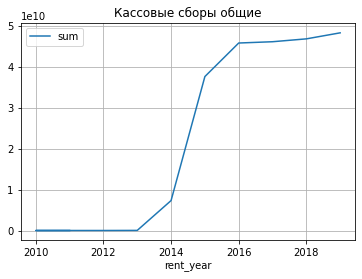

In [50]:
box_pivot_table = df_comm.pivot_table(index = 'rent_year', values = 'box_office', aggfunc=['sum'])
box_pivot_table.columns = ['sum']
box_pivot_table = box_pivot_table.sort_values('sum').head(10)
print(box_pivot_table)
print(box_pivot_table[box_pivot_table['sum']==box_pivot_table['sum'].max()])
print(box_pivot_table[box_pivot_table['sum']==box_pivot_table['sum'].min()])
box_pivot_table.plot(grid = True, title = 'Кассовые сборы общие');

За 10 лет общие сборы в кинотеатрах выросли с 2 млн до 48 млд рублей. Сборы резко выросли в 2014-2015 гг. С 2016 года темпы роста резко уменьшились. Минимальные сборы - 2056610.0 рублей были в 2011 году, максимальные - 48292400000.0 рублей в 2019 году.

                   mean       median
rent_year                           
2010       2.370009e+04      1700.00
2011       1.977510e+04      2995.00
2012       5.669965e+04      5760.00
2013       1.639798e+05      3500.00
2014       2.792778e+07     17952.50
2015       9.063326e+07   7196756.00
2016       9.871758e+07   5281042.10
2017       1.389172e+08  10668801.50
2018       1.056891e+08  10484019.76
2019       1.016682e+08   5731405.10


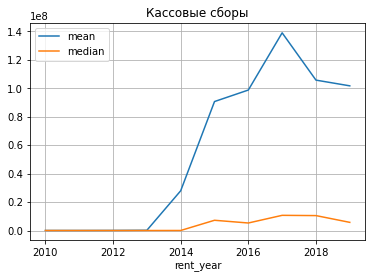

In [51]:
box_pivot_table2 = df_comm.pivot_table(index = 'rent_year', values = 'box_office', aggfunc=['mean', 'median'])
box_pivot_table2.columns = ['mean', 'median' ]
print(box_pivot_table2)
box_pivot_table2.plot(grid = True, title = 'Кассовые сборы');

Интересные данные получаются при анализе средних и медианных значений кассовых сборов. Медианные значения даже в самые лучшие 2017-18 гг в 13 раз меньше средних. Это говорит о том, что большую часть сборов формирует небольшое количество блокбастеров, у остальных фильмов в прокате сборы небольшие. 

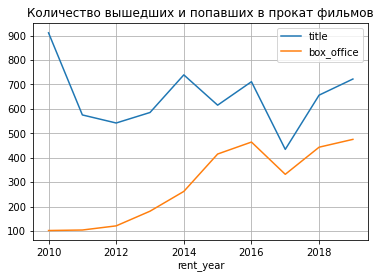

In [52]:
df_comm.groupby('rent_year')[['title', 'box_office']].count().plot(grid = True, title = 'Количество вышедших и попавших в прокат фильмов');

Как видно по графику, доля фильмов, которые выходят в кинотеатрах, а не только на DVD или других носителях, растёт.

In [53]:
df_comm['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [54]:
df_comm.query('rent_year > 2014').groupby(['rent_year', 'age_restriction'])['box_office'].sum()

rent_year  age_restriction                       
2015       «0+» - для любой зрительской аудитории    3.275774e+08
           «12+» - для детей старше 12 лет           1.361551e+10
           «16+» - для детей старше 16 лет           1.106221e+10
           «18+» - запрещено для детей               5.270763e+09
           «6+» - для детей старше 6 лет             7.336735e+09
2016       «0+» - для любой зрительской аудитории    8.012274e+07
           «12+» - для детей старше 12 лет           1.218773e+10
           «16+» - для детей старше 16 лет           1.595938e+10
           «18+» - запрещено для детей               6.765917e+09
           «6+» - для детей старше 6 лет             1.081181e+10
2017       «0+» - для любой зрительской аудитории    2.286571e+08
           «12+» - для детей старше 12 лет           7.350015e+09
           «16+» - для детей старше 16 лет           1.784271e+10
           «18+» - запрещено для детей               9.620582e+09
           «6+» - для дете

Суммарные сборы по годам и возрастной категории фильмов

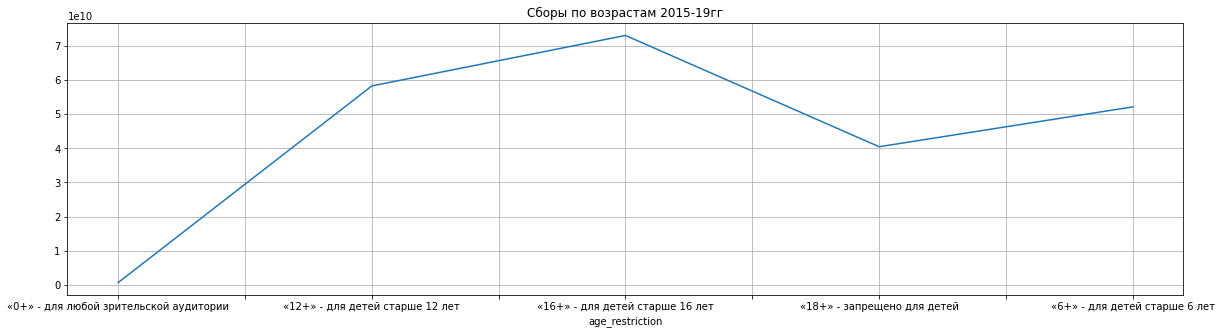

In [55]:
df_comm.query('rent_year > 2014').groupby(['age_restriction'])['box_office'].sum().plot(grid = True, figsize = (20,5), title = 'Сборы по возрастам 2015-19гг');

В графике зависимости сборов от возрастной категории за 5 лет видно, что самые большие сборы в категории "16+", несколько меньше в категориях "12+", "6+" и "18+". Минимальные сборы в категории "0+".

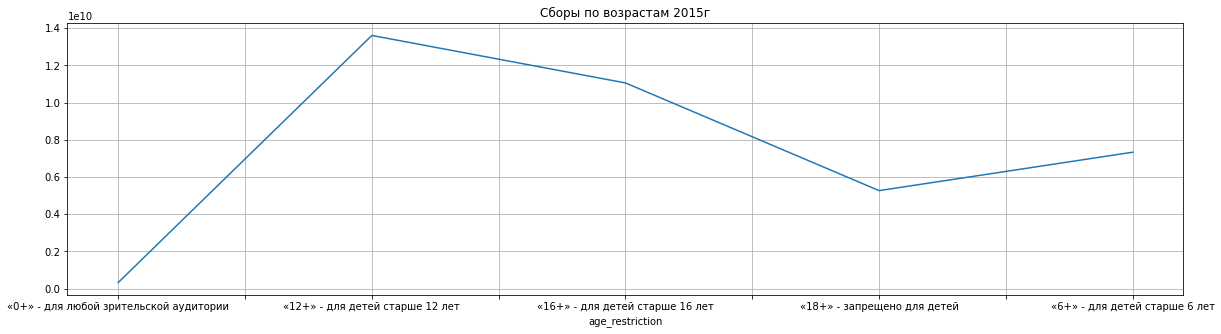

In [56]:
df_comm.query('rent_year == 2015').groupby(['age_restriction'])['box_office'].sum().plot(grid = True, figsize = (20,5), title = 'Сборы по возрастам 2015г');

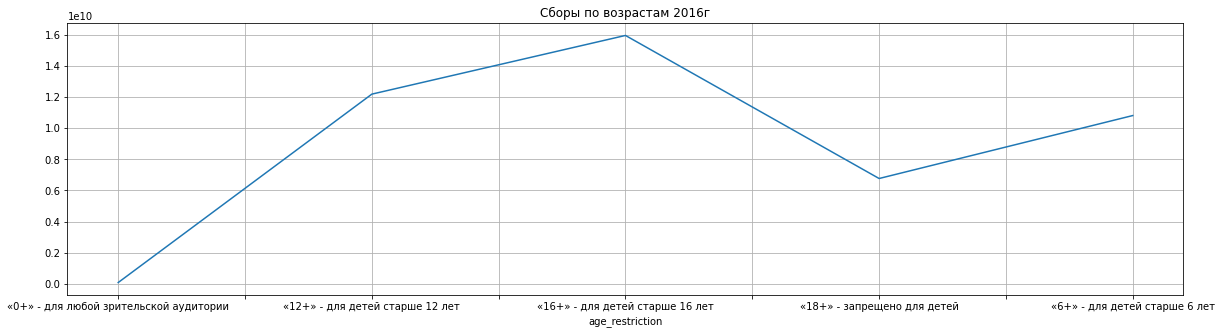

In [57]:
df_comm.query('rent_year == 2016').groupby(['age_restriction'])['box_office'].sum().plot(grid = True, figsize = (20,5), title = 'Сборы по возрастам 2016г');

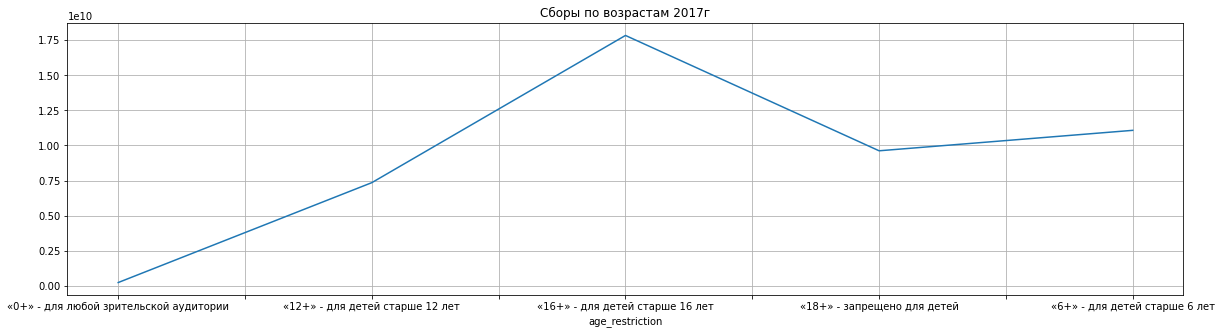

In [58]:
df_comm.query('rent_year == 2017').groupby(['age_restriction'])['box_office'].sum().plot(grid = True, figsize = (20,5), title = 'Сборы по возрастам 2017г');

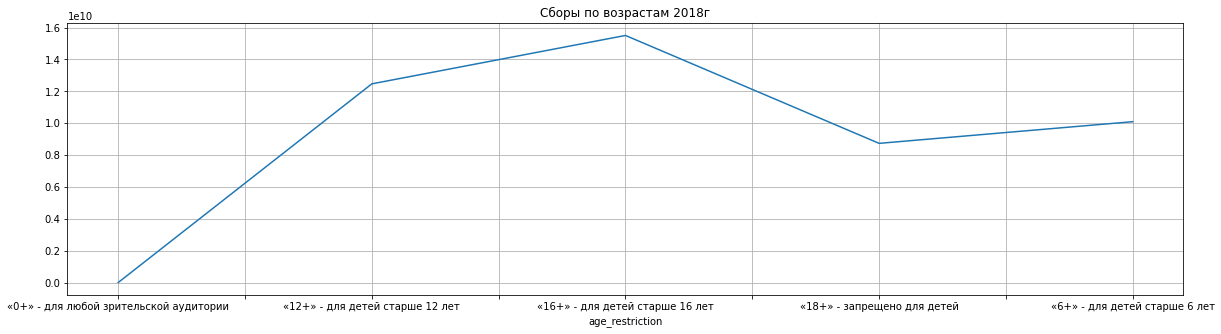

In [59]:
df_comm.query('rent_year == 2018').groupby(['age_restriction'])['box_office'].sum().plot(grid = True, figsize = (20,5), title = 'Сборы по возрастам 2018г');

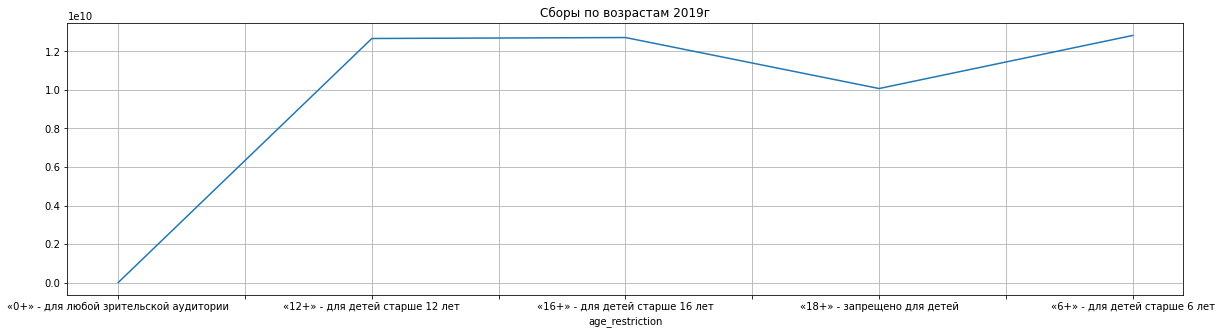

In [60]:
df_comm.query('rent_year == 2019').groupby(['age_restriction'])['box_office'].sum().plot(grid = True, figsize = (20,5), title = 'Сборы по возрастам 2019г');

Динамика сборов в разных возрастных категориях за 5 лет показывает, что если в 2015 году основной зритель - это подросток до 16 лет, то потом возраст зрителей увеличивается, а доля зрителей до 16 уменьшается. Но в 2019 году сборы в разных возрастных категориях сравнялись: ходят и дети со взрослыми и взрослые отдельно (растёт доля "18+"). Без динамики на минимальном уровне держится только категория "0+", т.е. дети до 6 лет - редкие зрители.

### Промежуточный вывод 3

Представлены данные за 10 лет (2010-2019гг). За это время кинопрокатная индустрия резко выросла. Количество фильмов увеличилось в 5 раз, кассовые сборы увеличились в 20 тыс раз. Большую часть сборов формирует небольшое количество блокбастеров, у остальных фильмов в прокате сборы небольшие. За последние 5 лет изменилась возрастная структура зрителей: если в 2015г основной зритель - подросток до 16 лет, то в 2019г сборы сопоставимы во всех возрастных категориях кроме "0+". 

## Исследовательский анализ данных фильмов, снятых с госучастием

In [61]:
df_gov_supp = df_comm.query('budget > 0')

In [62]:
df_gov_supp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 1281 to 7478
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  298 non-null    object             
 1   puNumber               298 non-null    object             
 2   show_start_date        298 non-null    datetime64[ns, UTC]
 3   type                   298 non-null    object             
 4   film_studio            298 non-null    object             
 5   production_country     298 non-null    object             
 6   director               298 non-null    object             
 7   producer               296 non-null    object             
 8   age_restriction        298 non-null    object             
 9   refundable_support     298 non-null    float64            
 10  nonrefundable_support  298 non-null    float64            
 11  budget                 298 non-null    float64        

In [63]:
df_gov_supp.describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office,rent_year,gov_part
count,2.980000e+02,2.980000e+02,2.980000e+02,298.000000,2.850000e+02,298.000000,298.000000
mean,1.203020e+07,4.919134e+07,1.383988e+08,6.015436,1.328373e+08,2016.758389,0.513651
std,2.570659e+07,6.132415e+07,1.955611e+08,1.133406,3.384785e+08,1.650022,0.170678
min,0.000000e+00,0.000000e+00,1.501000e+07,1.000000,1.550000e+03,2013.000000,0.044043
25%,0.000000e+00,2.500000e+07,4.622500e+07,5.400000,1.280236e+06,2015.000000,0.369987
50%,0.000000e+00,3.000000e+07,7.642700e+07,6.200000,1.676362e+07,2017.000000,0.589469
75%,1.375000e+07,4.000000e+07,1.560179e+08,6.700000,1.081952e+08,2018.000000,0.656333
max,1.800000e+08,4.000000e+08,2.305074e+09,8.500000,3.073569e+09,2019.000000,0.700000


По полученным данным можно сказать что выдавались возвратные и безвозвратные субсидии, при создании большинства фильмов использовались безвозвратные субсидии, которые составляли от 4,4 до 70% бюджета фильма. Рейтинг фильмов, снятых с госучастием не превышал 8,5; средний рейтинг 6,01, соответственно кассовые сборы большинства фильмов не окупили затрат на производство.

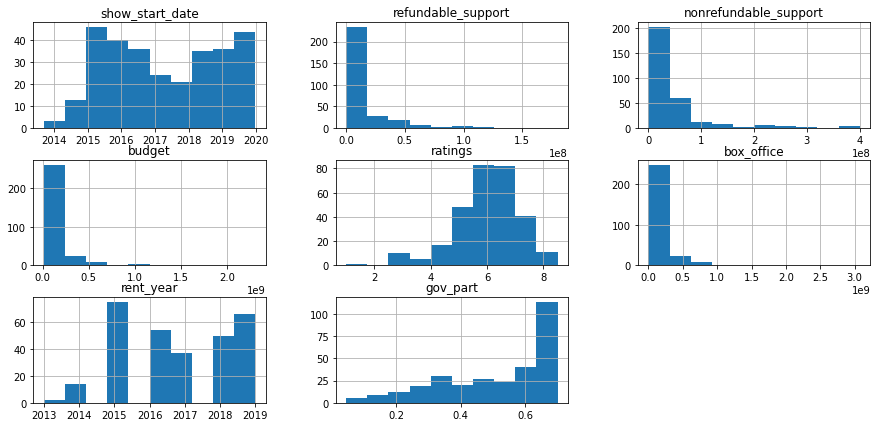

In [64]:
df_gov_supp.hist(figsize = (15,7));

rent_year
2013     2
2014    14
2015    75
2016    54
2017    37
2018    50
2019    66
Name: title, dtype: int64


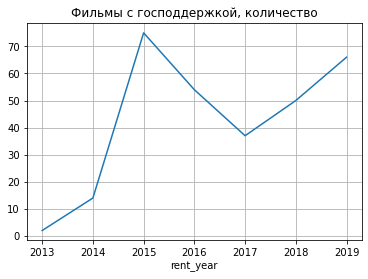

In [65]:
print(df_gov_supp.groupby('rent_year')['title'].count())
df_gov_supp.groupby('rent_year')['title'].count().plot(grid = True, title = 'Фильмы с господдержкой, количество');

Количество фильмов, снятых с госучастием за последние 7 лет выросло с 2 до 66; максимальное количество (75) в 2015 году, вероятнее всего, связано с изменением внутриполитической обстановки.

type
Анимационный       25
Документальный      1
Художественный    272
Name: title, dtype: int64


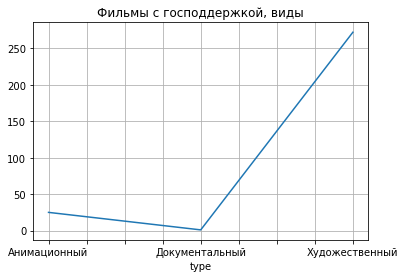

In [66]:
print(df_gov_supp.groupby('type')['title'].count())
df_gov_supp.groupby('type')['title'].count().plot(grid = True, title = 'Фильмы с господдержкой, виды');

Ожидаемо с государственной поддержкой снимается больше всего художественных фильмов.

financing_source
Министерство культуры               150
Министерство культуры, Фонд кино     20
Фонд кино                           128
Name: title, dtype: int64


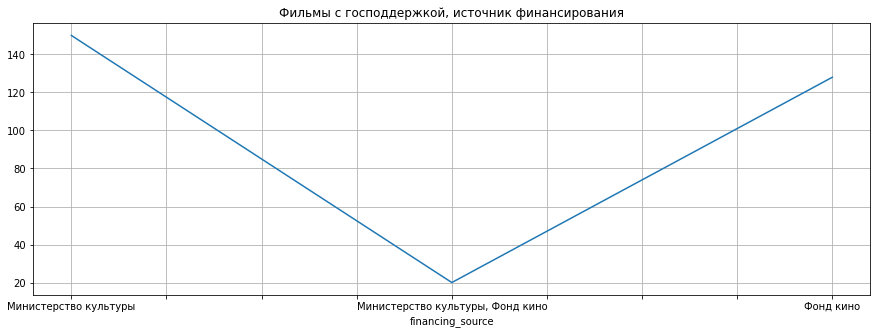

In [67]:
print(df_gov_supp.groupby('financing_source')['title'].count())
df_gov_supp.groupby('financing_source')['title'].count().plot(grid = True, title = 'Фильмы с господдержкой, источник финансирования', figsize = (15,5));

Источниками финансирования выступают Минкульт и Фонд кино, некоторые проекты финансируются совместно. 

pr_genre
биография       3
боевик          5
военный         9
детектив        5
детский         4
драма          91
история         4
комедия        68
криминал        3
мелодрама      14
мультфильм     26
мюзикл          4
приключения     7
реальное ТВ     1
семейный        7
спорт           3
триллер        14
ужасы          10
фантастика      9
фэнтези        11
Name: title, dtype: int64


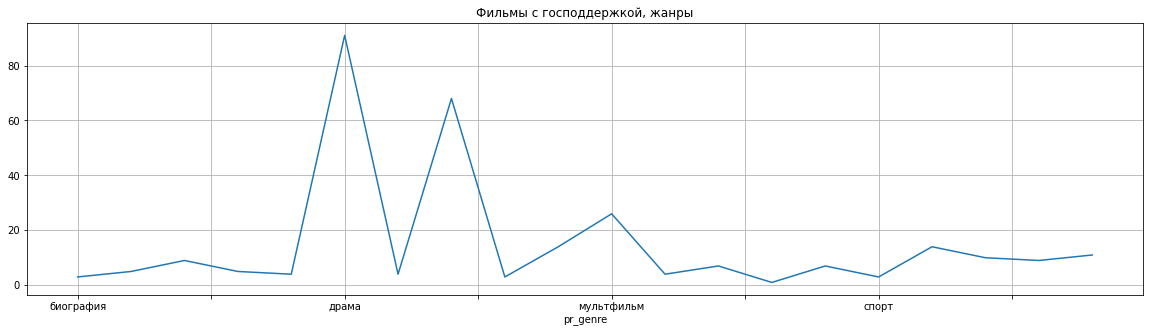

In [68]:
print(df_gov_supp.groupby('pr_genre')['title'].count())
df_gov_supp.groupby('pr_genre')['title'].count().plot(grid = True, title = 'Фильмы с господдержкой, жанры', figsize = (20,5));

По жанрам господдержку получают в основном драмы, комедии и анимационные фильмы

rent_year
2013    2.032239e+07
2014    1.007160e+09
2015    4.803397e+09
2016    4.945550e+09
2017    1.075294e+10
2018    8.070710e+09
2019    8.258543e+09
Name: box_office, dtype: float64


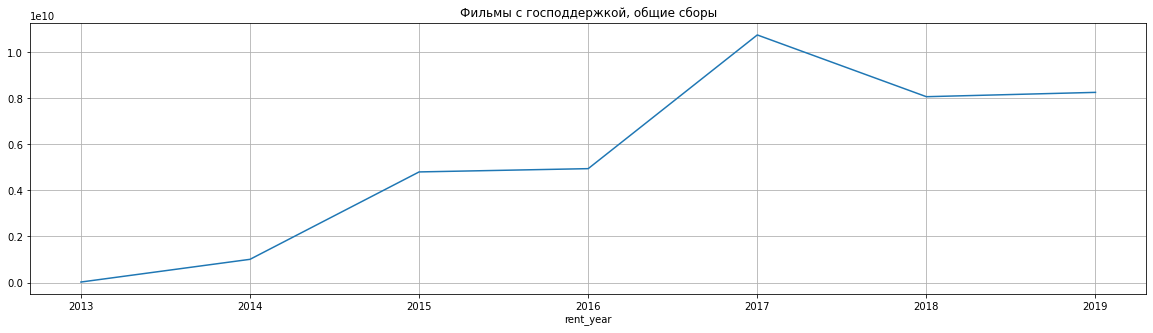

In [69]:
print(df_gov_supp.groupby('rent_year')['box_office'].sum())
df_gov_supp.groupby('rent_year')['box_office'].sum().plot(grid = True, title = 'Фильмы с господдержкой, общие сборы', figsize = (20,5));

rent_year
2013    1.277177e+08
2014    8.873871e+07
2015    9.459590e+07
2016    1.295793e+08
2017    1.863728e+08
2018    1.291237e+08
2019    1.863805e+08
Name: budget, dtype: float64


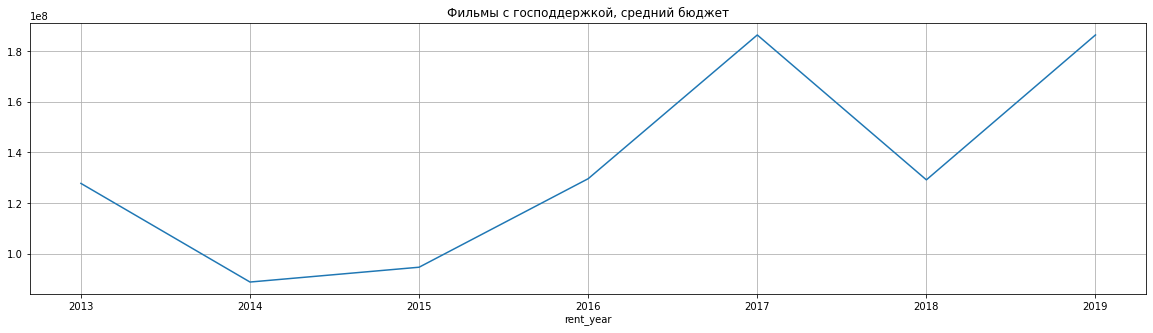

In [70]:
print(df_gov_supp.groupby('rent_year')['budget'].mean())
df_gov_supp.groupby('rent_year')['budget'].mean().plot(grid = True, title = 'Фильмы с господдержкой, средний бюджет', figsize = (20,5));

rent_year
2013    0.473197
2014    0.508650
2015    0.531374
2016    0.545568
2017    0.471506
2018    0.506038
2019    0.499078
Name: gov_part, dtype: float64


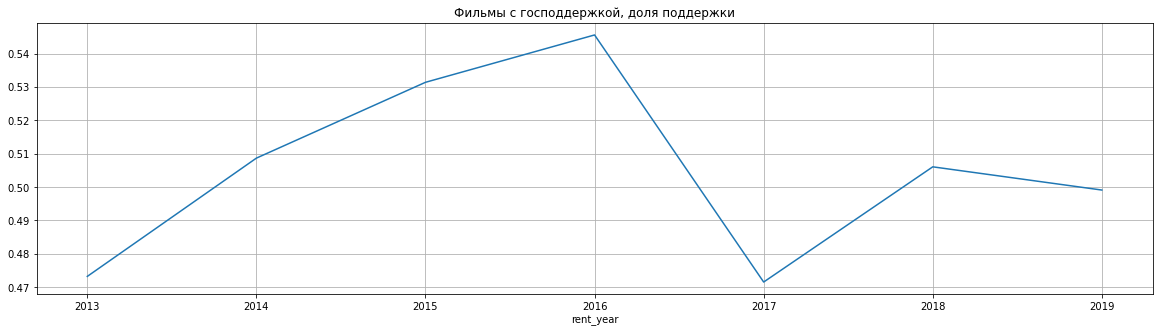

In [71]:
print(df_gov_supp.groupby('rent_year')['gov_part'].mean())
df_gov_supp.groupby('rent_year')['gov_part'].mean().plot(grid = True, title = 'Фильмы с господдержкой, доля поддержки', figsize = (20,5));

В среднем по годам доля госфинансирования меняется незначительно и составляет от 47 до 53%

rent_year
2013    6.700000
2014    5.964286
2015    6.061333
2016    5.692593
2017    6.054054
2018    6.042000
2019    6.175758
Name: ratings, dtype: float64


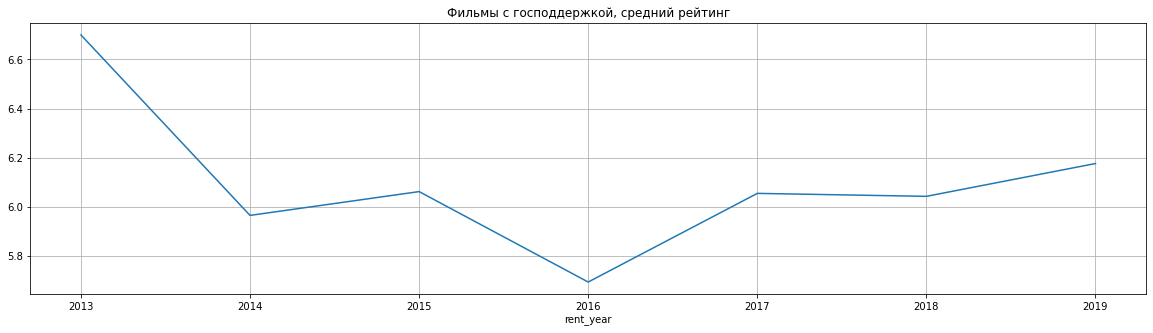

In [72]:
print(df_gov_supp.groupby('rent_year')['ratings'].mean())
df_gov_supp.groupby('rent_year')['ratings'].mean().plot(grid = True, title = 'Фильмы с господдержкой, средний рейтинг', figsize = (20,5));

Средний рейтинг фильмов менятся незначительно и составляет от 5.69 до 6.7

In [73]:
df_gov_supp['profit'] = df_gov_supp['box_office'] - df_gov_supp['budget']

rent_year
2013   -2.351130e+08
2014   -2.351819e+08
2015   -2.249296e+09
2016   -2.033025e+09
2017    3.962750e+09
2018    1.614524e+09
2019   -2.602511e+09
Name: profit, dtype: float64


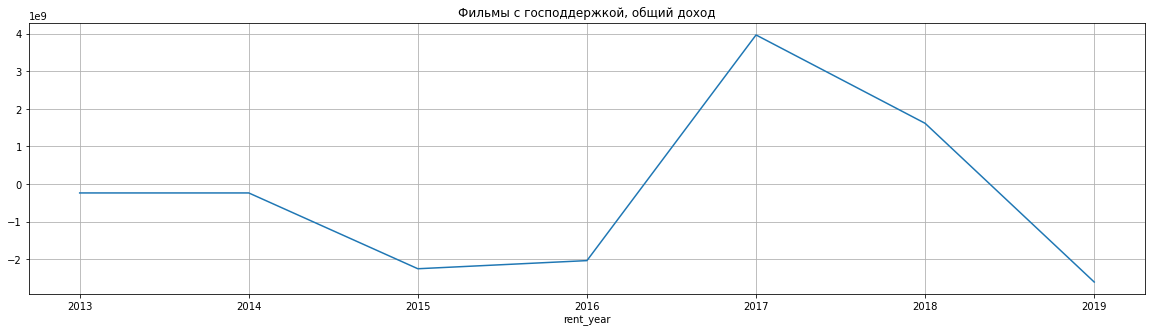

In [74]:
print(df_gov_supp.groupby('rent_year')['profit'].sum())
df_gov_supp.groupby('rent_year')['profit'].sum().plot(grid = True, title = 'Фильмы с господдержкой, общий доход', figsize = (20,5));

Только в 2017 и 2018 году фильмы, снятые с господдержкой окупились в кинотеатрах.

In [75]:
df_gov_supp['pr_director'].unique()

array(['А.Атанесян', 'Р.Давлетьяров',
       'Е.Миндадзе (псевдоним Катя Шагалова)', 'М.Угаров', 'С.Серегин',
       'В.Глаголева', 'А.Войтинский', 'Д.Федоров', 'Максим Свешников',
       'Т.Аленикова', 'А.Пиманов', 'А.Цицилин', 'А.Стриженов', 'С.Попов',
       'Д.Месхиев', 'В.Щегольков', 'А.Прошкин', 'П.Санаев', 'С.Мокрицкий',
       'А.Мельник', 'А.Аксененко', 'В.Демент', 'Ф.Абрютин', 'М.Бальчюнас',
       'Э.Архангельская', 'К.Шипенко', 'Д.Елеонский', 'А.Звягинцев',
       'Е.Татаров', 'А.Федорченко', 'Ю.Фетинг', 'И.Чижиков', 'А.Меликян',
       'Э.Манжеева', 'А.Калинкин',
       'Е.Константинова (псевдоним Алена Званцева)', 'Н.Джорджадзе',
       'Ф.Дмитриев', 'Р.Каримов', 'А.Аравин', 'С.Говорухин', 'К.Ангелина',
       'А.Карпиловский', 'Стефано Лоренци', 'В.Хотиненко',
       'В.Штерянов при участии Е.Немых', 'С.Комаров', 'И.Северов',
       'А.Ананикян', 'К.Белевич', 'Д.Чернов', 'А.Герман', 'А.Темников',
       'Р.Ильясов', 'С.Пускепалис', 'Н.Кудряшова', 'Е.Хазанова',
       'Э.

In [76]:
df_gov_supp.groupby('pr_director')['title'].count().sort_values(ascending=False)

pr_director
Р.Давлетьяров                                 5
Д.Дьяченко                                    4
С.Андреасян                                   4
С.Мокрицкий                                   3
А.Котт                                        3
                                             ..
Е.Жигаева                                     1
Е.Константинова (псевдоним Алена Званцева)    1
Е.Миндадзе (псевдоним Катя Шагалова)          1
Е.Михалков-Кончаловский                       1
Я.Поляруш                                     1
Name: title, Length: 243, dtype: int64

Не артхаус...

### Промежуточный вывод 4

В течении 5 лет количество фильмов, снятых с госучастием растёт, источниками финансирования выступают Минкульт и Фонд кино, субсидиями (по большей части безвозвратными) покрывается около 50% бюджета. Рейтинг составляет от 1,0 до 8,5; в среднем - 6.01. Кассовые сборы большинства фильмов не окупают затрат на его производство. Суммарно, только в 2017 и 2018 гг у фильмов, снятых с участием государства,  общие кассовые сборы превысили общий бюджет.

# Общий вывод

За 2011-2019 гг индустрия кинопроката практически родилась и выросла. Количество фильмов увеличилось в 5 раз, кассовые сборы увеличились в 20 тыс раз. Большую часть сборов формирует небольшое количество блокбастеров, у остальных фильмов в прокате сборы небольшие. Изменился зритель, если в 2015 году в кинотеатры ходили в основном подростки, то в 2019 году ходят все (дети от 6 лет всех возрастов и взрослые). В России растёт количество фильмов, снятых с использованием государственных субсидий. Рейтинг этих фильмов составляет от 1,0 до 8,5; в среднем - 6.01. Кассовые сборы большинства фильмов не окупают затрат на его производство. Суммарно, только в 2017 и 2018 гг у фильмов, снятых с участием государства,  общие кассовые сборы превысили общий бюджет.